In [128]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , FunctionTransformer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score

In [129]:
df_desc = pd.read_csv("data/key.csv", index_col = 0)
df = pd.read_csv("data/data_clean.csv")
df = df.drop("Unnamed: 0",axis=1)

In [130]:
df.dtypes

funder                     object
gps_height                  int64
installer                  object
wpt_name                   object
basin                      object
region_code                 int64
district_code               int64
population                  int64
public_meeting            float64
permit                    float64
extraction_type_class      object
management                 object
payment_type               object
quality_group              object
quantity                   object
source                     object
source_class               object
waterpoint_type            object
status_group               object
construction_year_bins     object
dtype: object

In [131]:
df

,funder,gps_height,installer,wpt_name,basin,region_code,district_code,population,public_meeting,permit,extraction_type_class,management,payment_type,quality_group,quantity,source,source_class,waterpoint_type,status_group,construction_year_bins
0,other,1390,other,none,Lake Nyasa,11,5,109,1.0,0.0,gravity,vwc,annually,good,enough,spring,groundwater,communal standpipe,functional,"(1990.0, 2000.0]"
1,other,1399,other,Zahanati,Lake Victoria,20,2,280,NaN,1.0,gravity,wug,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,"(2000.0, 2010.0]"
2,other,686,other,other,Pangani,21,4,250,1.0,1.0,gravity,vwc,per bucket,good,enough,dam,surface,communal standpipe multiple,functional,"(2000.0, 2010.0]"
3,other,263,other,other,Ruvuma / Southern Coast,90,63,58,1.0,1.0,submersible,vwc,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional,"(1980.0, 1990.0]"
4,other,0,other,Shuleni,Lake Victoria,18,1,0,1.0,1.0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,"(1980.0, 1990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,other,1210,other,other,Pangani,3,5,125,1.0,1.0,gravity,water board,per bucket,good,enough,spring,groundwater,communal standpipe,functional,"(1990.0, 2000.0]"
59396,other,1212,other,other,Rufiji,11,4,56,1.0,1.0,gravity,vwc,annually,good,enough,river,surface,communal standpipe,functional,"(1990.0, 2000.0]"
59397,other,0,other,other,Rufiji,12,7,0,1.0,0.0,handpump,vwc,monthly,fluoride,enough,machine dbh,groundwater,hand pump,functional,"(1980.0, 1990.0]"
59398,other,0,other,other,Rufiji,1,4,0,1.0,1.0,handpump,vwc,never pay,good,insufficient,shallow well,groundwater,hand pump,functional,"(1980.0, 1990.0]"


In [132]:
def int_to_object(df):
    df["region_code"] = df["region_code"].astype(object)
    df["district_code"] = df["district_code"].astype(object)
    df["public_meeting"] = df["public_meeting"].astype(str)
    df["permit"] = df["permit"].astype(str)
    df["construction_year_bins"] = df["construction_year_bins"].astype(str)
    return df.dtypes

In [133]:
df

,funder,gps_height,installer,wpt_name,basin,region_code,district_code,population,public_meeting,permit,extraction_type_class,management,payment_type,quality_group,quantity,source,source_class,waterpoint_type,status_group,construction_year_bins
0,other,1390,other,none,Lake Nyasa,11,5,109,1.0,0.0,gravity,vwc,annually,good,enough,spring,groundwater,communal standpipe,functional,"(1990.0, 2000.0]"
1,other,1399,other,Zahanati,Lake Victoria,20,2,280,NaN,1.0,gravity,wug,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,"(2000.0, 2010.0]"
2,other,686,other,other,Pangani,21,4,250,1.0,1.0,gravity,vwc,per bucket,good,enough,dam,surface,communal standpipe multiple,functional,"(2000.0, 2010.0]"
3,other,263,other,other,Ruvuma / Southern Coast,90,63,58,1.0,1.0,submersible,vwc,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional,"(1980.0, 1990.0]"
4,other,0,other,Shuleni,Lake Victoria,18,1,0,1.0,1.0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,"(1980.0, 1990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,other,1210,other,other,Pangani,3,5,125,1.0,1.0,gravity,water board,per bucket,good,enough,spring,groundwater,communal standpipe,functional,"(1990.0, 2000.0]"
59396,other,1212,other,other,Rufiji,11,4,56,1.0,1.0,gravity,vwc,annually,good,enough,river,surface,communal standpipe,functional,"(1990.0, 2000.0]"
59397,other,0,other,other,Rufiji,12,7,0,1.0,0.0,handpump,vwc,monthly,fluoride,enough,machine dbh,groundwater,hand pump,functional,"(1980.0, 1990.0]"
59398,other,0,other,other,Rufiji,1,4,0,1.0,1.0,handpump,vwc,never pay,good,insufficient,shallow well,groundwater,hand pump,functional,"(1980.0, 1990.0]"


In [134]:
int_to_object(df)

funder                    object
gps_height                 int64
installer                 object
wpt_name                  object
basin                     object
region_code               object
district_code             object
population                 int64
public_meeting            object
permit                    object
extraction_type_class     object
management                object
payment_type              object
quality_group             object
quantity                  object
source                    object
source_class              object
waterpoint_type           object
status_group              object
construction_year_bins    object
dtype: object

In [135]:
X = df.drop(["status_group"], axis=1)
y = df['status_group']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=465615615)

In [137]:
X_train.dtypes

funder                    object
gps_height                 int64
installer                 object
wpt_name                  object
basin                     object
region_code               object
district_code             object
population                 int64
public_meeting            object
permit                    object
extraction_type_class     object
management                object
payment_type              object
quality_group             object
quantity                  object
source                    object
source_class              object
waterpoint_type           object
construction_year_bins    object
dtype: object

In [138]:
X_train["waterpoint_type"].value_counts()

communal standpipe             21389
hand pump                      13085
other                           4822
communal standpipe multiple     4585
improved spring                  575
cattle trough                     90
dam                                4
Name: waterpoint_type, dtype: int64

In [139]:
X_train["wpt_name"].value_counts()

other        39316
none          2675
Shuleni       1319
Zahanati       617
Msikitini      390
Kanisani       233
Name: wpt_name, dtype: int64

In [140]:
def grab_numeric(df):
    return df.select_dtypes(include=['int64'])

In [141]:
GrabNumeric = FunctionTransformer(grab_numeric)

In [142]:
GrabNumeric

FunctionTransformer(func=<function grab_numeric at 0x000001379660E3A0>)

In [143]:
pipe= Pipeline(steps=[("num", GrabNumeric),
                      ( "ss", StandardScaler())])

In [144]:
pipe.fit(X_train)


Pipeline(steps=[('num',
                 FunctionTransformer(func=<function grab_numeric at 0x000001379660E3A0>)),
                ('ss', StandardScaler())])

In [145]:
pipe.transform(X_train)

array([[-0.84040878,  0.25062257],
       [-0.96708423, -0.38007373],
       [ 0.55590018,  0.29266899],
       ...,
       [-0.96708423, -0.38007373],
       [ 0.77614273, -0.37797141],
       [-0.96708423, -0.38007373]])

In [146]:
j = -1
for i in X_train.columns:
    j+=1
    print("Index Number", j,i)

Index Number 0 funder
Index Number 1 gps_height
Index Number 2 installer
Index Number 3 wpt_name
Index Number 4 basin
Index Number 5 region_code
Index Number 6 district_code
Index Number 7 population
Index Number 8 public_meeting
Index Number 9 permit
Index Number 10 extraction_type_class
Index Number 11 management
Index Number 12 payment_type
Index Number 13 quality_group
Index Number 14 quantity
Index Number 15 source
Index Number 16 source_class
Index Number 17 waterpoint_type
Index Number 18 construction_year_bins


In [147]:
# We'll throw these mini-pipelines into our ColumnTransformer.

subpipe_num = Pipeline(steps=[('num_impute', SimpleImputer(strategy="median")),
                           ('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='constant')),
                             ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [148]:
subpipe_num1 = Pipeline(steps=[('num_impute', SimpleImputer(strategy="median")),
                           ('ss', StandardScaler())])
subpipe_cat1 = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='constant'))])

In [149]:
CT1 = ColumnTransformer(transformers=[('subpipe_num', subpipe_num1, [1,7]),
                                         ('subpipe_cat', subpipe_cat1, [0,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18])])

In [150]:
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, [1,7]),
                                         ('subpipe_cat', subpipe_cat, [0,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18])])

In [151]:
logreg_model_pipe = Pipeline(steps=([("ct", CT), 
                                    ("logreg", LogisticRegression(random_state=465654))]))

In [390]:
logreg_model_pipe.fit(X_train, y_train)

C:\Users\Owner\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [391]:
logreg_model_pipe.score(X_train, y_train)

0.7407856341189675

In [392]:
rfc = RandomForestClassifier(random_state=165156156, n_jobs=-1)
rfc_model_pipe = Pipeline([("ct", CT), ("rfc", rfc)])

In [393]:
rfc_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [394]:
rfc_model_pipe.score(X_train, y_train)

0.9449382716049383

In [395]:
rfc_2 = RandomForestClassifier(random_state=42, max_depth=11, n_jobs=-1)
rfc_2_pipe= Pipeline([("ct", CT), ('rfc_2', rfc_2)])

In [396]:
rfc_2_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [397]:
rfc_2_pipe.score(X_train, y_train)

0.7611896745230079

In [398]:
y_hat = rfc_2_pipe.predict(X_test)

In [399]:
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat,average= 'macro'), 2)}.
""")


Our final model's accuracy on the test set is 0.75. 

Our final model's recall on the test set is 0.53 

Our final model's precision on the test set is 0.76 

Our final model's f1-score on the test is 0.54.



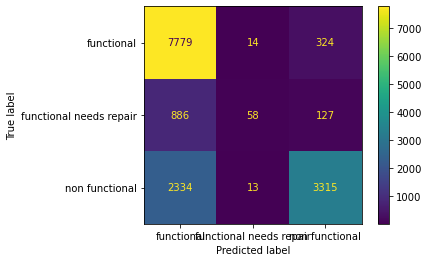

In [400]:
plot_confusion_matrix(rfc_2_pipe, X_test, y_test);

In [401]:
gbc_model_pipe = Pipeline([('ct', CT), ('gbc', GradientBoostingClassifier(random_state=42))])

In [403]:
gbc_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [404]:
gbc_model_pipe.score(X_train, y_train)

0.7506846240179573

In [407]:
y_hat = gbc_model_pipe.predict(X_test)
y_hat

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'functional'], dtype=object)

In [409]:
print(f"""
Our first model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)}. \n
Our first model's recall on the test set is {round(recall_score(y_test, y_hat,average= 'macro'), 2)} \n
Our first model's precision on the test set is {round(precision_score(y_test, y_hat,average= 'macro'), 2)} \n
Our first model's f1-score on the test is {round(f1_score(y_test, y_hat,average= 'macro'), 2)}.
""")


Our first model's accuracy on the test set is 0.75. 

Our first model's recall on the test set is 0.55 

Our first model's precision on the test set is 0.74 

Our first model's f1-score on the test is 0.57.



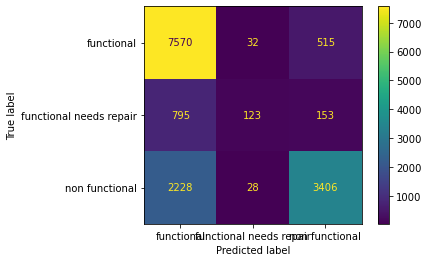

In [410]:
plot_confusion_matrix(gbc_model_pipe, X_test, y_test);

In [421]:
X_train

,funder,gps_height,installer,wpt_name,basin,region_code,district_code,population,public_meeting,permit,extraction_type_class,management,payment_type,quality_group,quantity,source,source_class,waterpoint_type,construction_year_bins
58168,other,88,other,other,Wami / Ruvu,6,3,300,1.0,0.0,handpump,vwc,per bucket,good,enough,machine dbh,groundwater,hand pump,"(2000.0, 2010.0]"
11994,other,0,other,other,Lake Nyasa,12,4,0,1.0,nan,gravity,vwc,unknown,good,enough,spring,groundwater,communal standpipe,"(1980.0, 1990.0]"
43128,Danida,1058,DWE,other,Lake Nyasa,10,2,320,1.0,1.0,handpump,vwc,monthly,good,dry,shallow well,groundwater,hand pump,"(1990.0, 2000.0]"
37495,Danida,1031,other,none,Rufiji,11,1,1,1.0,1.0,gravity,vwc,annually,good,enough,spring,groundwater,communal standpipe,"(1980.0, 1990.0]"
58943,other,654,other,other,Pangani,4,6,800,1.0,1.0,submersible,vwc,per bucket,good,enough,river,surface,communal standpipe,"(2000.0, 2010.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28930,other,0,other,other,Lake Rukwa,12,6,0,1.0,0.0,other,vwc,on failure,good,enough,shallow well,groundwater,other,"(1980.0, 1990.0]"
18722,other,-23,other,other,Ruvuma / Southern Coast,99,1,400,1.0,0.0,other,vwc,unknown,good,enough,machine dbh,groundwater,other,"(1980.0, 1990.0]"
35280,Government Of Tanzania,0,Government,other,Lake Rukwa,12,1,0,1.0,1.0,handpump,vwc,per bucket,good,enough,shallow well,groundwater,hand pump,"(1980.0, 1990.0]"
31507,other,1211,other,Shuleni,Pangani,3,1,1,1.0,1.0,gravity,parastatal,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,"(2010.0, 2013.0]"


In [444]:
X_train

,funder,gps_height,installer,wpt_name,basin,region_code,district_code,population,public_meeting,permit,extraction_type_class,management,payment_type,quality_group,quantity,source,source_class,waterpoint_type,construction_year_bins
58168,other,88,other,other,Wami / Ruvu,6,3,300,1.0,0.0,handpump,vwc,per bucket,good,enough,machine dbh,groundwater,hand pump,"(2000.0, 2010.0]"
11994,other,0,other,other,Lake Nyasa,12,4,0,1.0,nan,gravity,vwc,unknown,good,enough,spring,groundwater,communal standpipe,"(1980.0, 1990.0]"
43128,Danida,1058,DWE,other,Lake Nyasa,10,2,320,1.0,1.0,handpump,vwc,monthly,good,dry,shallow well,groundwater,hand pump,"(1990.0, 2000.0]"
37495,Danida,1031,other,none,Rufiji,11,1,1,1.0,1.0,gravity,vwc,annually,good,enough,spring,groundwater,communal standpipe,"(1980.0, 1990.0]"
58943,other,654,other,other,Pangani,4,6,800,1.0,1.0,submersible,vwc,per bucket,good,enough,river,surface,communal standpipe,"(2000.0, 2010.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28930,other,0,other,other,Lake Rukwa,12,6,0,1.0,0.0,other,vwc,on failure,good,enough,shallow well,groundwater,other,"(1980.0, 1990.0]"
18722,other,-23,other,other,Ruvuma / Southern Coast,99,1,400,1.0,0.0,other,vwc,unknown,good,enough,machine dbh,groundwater,other,"(1980.0, 1990.0]"
35280,Government Of Tanzania,0,Government,other,Lake Rukwa,12,1,0,1.0,1.0,handpump,vwc,per bucket,good,enough,shallow well,groundwater,hand pump,"(1980.0, 1990.0]"
31507,other,1211,other,Shuleni,Pangani,3,1,1,1.0,1.0,gravity,parastatal,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,"(2010.0, 2013.0]"


In [445]:
CT.fit(X_train)

ColumnTransformer(transformers=[('subpipe_num',
                                 Pipeline(steps=[('num_impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('ss', StandardScaler())]),
                                 [1, 7]),
                                ('subpipe_cat',
                                 Pipeline(steps=[('cat_impute',
                                                  SimpleImputer(strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 [0, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15,
                                  16, 17, 18])])

In [446]:
X_train

,funder,gps_height,installer,wpt_name,basin,region_code,district_code,population,public_meeting,permit,extraction_type_class,management,payment_type,quality_group,quantity,source,source_class,waterpoint_type,construction_year_bins
58168,other,88,other,other,Wami / Ruvu,6,3,300,1.0,0.0,handpump,vwc,per bucket,good,enough,machine dbh,groundwater,hand pump,"(2000.0, 2010.0]"
11994,other,0,other,other,Lake Nyasa,12,4,0,1.0,nan,gravity,vwc,unknown,good,enough,spring,groundwater,communal standpipe,"(1980.0, 1990.0]"
43128,Danida,1058,DWE,other,Lake Nyasa,10,2,320,1.0,1.0,handpump,vwc,monthly,good,dry,shallow well,groundwater,hand pump,"(1990.0, 2000.0]"
37495,Danida,1031,other,none,Rufiji,11,1,1,1.0,1.0,gravity,vwc,annually,good,enough,spring,groundwater,communal standpipe,"(1980.0, 1990.0]"
58943,other,654,other,other,Pangani,4,6,800,1.0,1.0,submersible,vwc,per bucket,good,enough,river,surface,communal standpipe,"(2000.0, 2010.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28930,other,0,other,other,Lake Rukwa,12,6,0,1.0,0.0,other,vwc,on failure,good,enough,shallow well,groundwater,other,"(1980.0, 1990.0]"
18722,other,-23,other,other,Ruvuma / Southern Coast,99,1,400,1.0,0.0,other,vwc,unknown,good,enough,machine dbh,groundwater,other,"(1980.0, 1990.0]"
35280,Government Of Tanzania,0,Government,other,Lake Rukwa,12,1,0,1.0,1.0,handpump,vwc,per bucket,good,enough,shallow well,groundwater,hand pump,"(1980.0, 1990.0]"
31507,other,1211,other,Shuleni,Pangani,3,1,1,1.0,1.0,gravity,parastatal,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,"(2010.0, 2013.0]"


In [23]:
param_grid = {'learning_rate': [0.01,0.001],
               'max_depth': [3,4],
               'min_samples_leaf': [5,6],
               'n_estimators':[100, 200]}

In [25]:
gbc_cv_pipe = Pipeline(steps=([("ct", CT), 
                                    ("gbc", GridSearchCV(estimator=GradientBoostingClassifier(),
                                 param_grid=param_grid,
                                 n_jobs=-1))]))

In [26]:
gbc_cv_pipe.fit(X_train, y_train)

In [412]:
gbc_model_pipe2 = Pipeline([('ct', CT), ('gbc', GradientBoostingClassifier(learning_rate=.01, n_estimators=1000, random_state=42))])

In [413]:
gbc_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [414]:
gbc_model_pipe.score(X_train, y_train)

0.7506846240179573

In [ ]:
gbc_model_pipe2 = Pipeline([('ct', CT), ('gbc', GradientBoostingClassifier(learning_rate=.01, n_estimators=1000, random_state=42))])

In [4]:
from catboost import CatBoostClassifier

In [ ]:
param_grid = {'alpha': [0.01,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],}

In [ ]:
gbc_cv_pipe = Pipeline(steps=([("ct", CT), 
                                    ("gbc", GridSearchCV(estimator=CatBoostClassifier(),
                                 param_grid=param_grid,
                                 n_jobs=-1))]))

In [79]:
from catboost import CatBoostClassifier
from sklearn import preprocessing

In [154]:
CT1

ColumnTransformer(transformers=[('subpipe_num',
                                 Pipeline(steps=[('num_impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('ss', StandardScaler())]),
                                 [1, 7]),
                                ('subpipe_cat',
                                 Pipeline(steps=[('cat_impute',
                                                  SimpleImputer(strategy='constant'))]),
                                 [0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14,
                                  15, 16, 17, 18])])

In [164]:
cat_boost_pipe = Pipeline([('ct1', CT), ('cat', CatBoostClassifier())])

In [165]:
cat_boost_pipe.fit(X_train, y_train)

Learning rate set to 0.096032
0:	learn: 1.0314107	total: 73.4ms	remaining: 1m 13s
1:	learn: 0.9796960	total: 80.8ms	remaining: 40.3s
2:	learn: 0.9367317	total: 90.5ms	remaining: 30.1s
3:	learn: 0.9004110	total: 98.8ms	remaining: 24.6s
4:	learn: 0.8713392	total: 108ms	remaining: 21.5s
5:	learn: 0.8470147	total: 116ms	remaining: 19.3s
6:	learn: 0.8250134	total: 125ms	remaining: 17.7s
7:	learn: 0.8067971	total: 135ms	remaining: 16.8s
8:	learn: 0.7911251	total: 144ms	remaining: 15.8s
9:	learn: 0.7779898	total: 152ms	remaining: 15s
10:	learn: 0.7656037	total: 160ms	remaining: 14.3s
11:	learn: 0.7543919	total: 169ms	remaining: 13.9s
12:	learn: 0.7452513	total: 178ms	remaining: 13.5s
13:	learn: 0.7363542	total: 186ms	remaining: 13.1s
14:	learn: 0.7286843	total: 194ms	remaining: 12.7s
15:	learn: 0.7206779	total: 203ms	remaining: 12.5s
16:	learn: 0.7150116	total: 212ms	remaining: 12.3s
17:	learn: 0.7082073	total: 222ms	remaining: 12.1s
18:	learn: 0.7031578	total: 231ms	remaining: 11.9s
19:	lear

Pipeline(steps=[('ct1',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                              

In [166]:
cat_boost_pipe.score(X_train, y_train)

0.8174859708193042

In [167]:
cross_validate(cat_boost_pipe, X_train, y_train, return_train_score=True)

Learning rate set to 0.094945
0:	learn: 1.0334755	total: 20.6ms	remaining: 20.6s
1:	learn: 0.9822890	total: 50.8ms	remaining: 25.4s
2:	learn: 0.9377779	total: 92.6ms	remaining: 30.8s
3:	learn: 0.9027007	total: 132ms	remaining: 32.8s
4:	learn: 0.8742053	total: 150ms	remaining: 29.8s
5:	learn: 0.8494120	total: 161ms	remaining: 26.6s
6:	learn: 0.8269780	total: 170ms	remaining: 24.1s
7:	learn: 0.8083844	total: 179ms	remaining: 22.2s
8:	learn: 0.7923861	total: 191ms	remaining: 21.1s
9:	learn: 0.7787139	total: 200ms	remaining: 19.8s
10:	learn: 0.7651712	total: 209ms	remaining: 18.8s
11:	learn: 0.7539341	total: 219ms	remaining: 18s
12:	learn: 0.7446272	total: 229ms	remaining: 17.4s
13:	learn: 0.7372138	total: 237ms	remaining: 16.7s
14:	learn: 0.7292686	total: 247ms	remaining: 16.2s
15:	learn: 0.7223758	total: 256ms	remaining: 15.8s
16:	learn: 0.7173074	total: 266ms	remaining: 15.4s
17:	learn: 0.7112840	total: 276ms	remaining: 15s
18:	learn: 0.7063486	total: 284ms	remaining: 14.7s
19:	learn: 0

{'fit_time': array([ 9.87068415, 10.17342234, 10.66584849,  9.96135187,  9.85843039]),
 'score_time': array([0.36908245, 0.37508583, 0.38308692, 0.36708236, 0.38809299]),
 'test_score': array([0.78653199, 0.79001122, 0.78855219, 0.78428732, 0.78484848]),
 'train_score': array([0.8219697 , 0.82146465, 0.81874299, 0.82275533, 0.82379349])}

In [197]:
cat_boost_pipe1 = Pipeline([('ct', CT), ('cat', CatBoostClassifier())])
cat_boost_pipe1.fit(X_train, y_train)

Learning rate set to 0.096032
0:	learn: 1.0314107	total: 47.9ms	remaining: 47.9s
1:	learn: 0.9796960	total: 55.3ms	remaining: 27.6s
2:	learn: 0.9367317	total: 64.4ms	remaining: 21.4s
3:	learn: 0.9004110	total: 72.7ms	remaining: 18.1s
4:	learn: 0.8713392	total: 82.6ms	remaining: 16.4s
5:	learn: 0.8470147	total: 90.7ms	remaining: 15s
6:	learn: 0.8250134	total: 99.4ms	remaining: 14.1s
7:	learn: 0.8067971	total: 107ms	remaining: 13.3s
8:	learn: 0.7911251	total: 116ms	remaining: 12.8s
9:	learn: 0.7779898	total: 125ms	remaining: 12.4s
10:	learn: 0.7656037	total: 133ms	remaining: 12s
11:	learn: 0.7543919	total: 141ms	remaining: 11.6s
12:	learn: 0.7452513	total: 149ms	remaining: 11.3s
13:	learn: 0.7363542	total: 157ms	remaining: 11.1s
14:	learn: 0.7286843	total: 165ms	remaining: 10.9s
15:	learn: 0.7206779	total: 174ms	remaining: 10.7s
16:	learn: 0.7150116	total: 183ms	remaining: 10.6s
17:	learn: 0.7082073	total: 192ms	remaining: 10.5s
18:	learn: 0.7031578	total: 201ms	remaining: 10.4s
19:	lear

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [198]:
cat_boost_pipe1.score(X_train, y_train)

0.8174859708193042

In [206]:
cross_validate(cat_boost_pipe1, X_train, y_train, return_train_score=True)

Learning rate set to 0.094945
0:	learn: 1.0334755	total: 28.4ms	remaining: 28.4s
1:	learn: 0.9822890	total: 34.7ms	remaining: 17.3s
2:	learn: 0.9377779	total: 43.3ms	remaining: 14.4s
3:	learn: 0.9027007	total: 50.8ms	remaining: 12.7s
4:	learn: 0.8742053	total: 58.4ms	remaining: 11.6s
5:	learn: 0.8494120	total: 65.2ms	remaining: 10.8s
6:	learn: 0.8269780	total: 72.6ms	remaining: 10.3s
7:	learn: 0.8083844	total: 79.2ms	remaining: 9.81s
8:	learn: 0.7923861	total: 86.6ms	remaining: 9.53s
9:	learn: 0.7787139	total: 93.3ms	remaining: 9.24s
10:	learn: 0.7651712	total: 100ms	remaining: 8.99s
11:	learn: 0.7539341	total: 108ms	remaining: 8.88s
12:	learn: 0.7446272	total: 115ms	remaining: 8.7s
13:	learn: 0.7372138	total: 123ms	remaining: 8.63s
14:	learn: 0.7292686	total: 129ms	remaining: 8.5s
15:	learn: 0.7223758	total: 137ms	remaining: 8.44s
16:	learn: 0.7173074	total: 144ms	remaining: 8.32s
17:	learn: 0.7112840	total: 152ms	remaining: 8.28s
18:	learn: 0.7063486	total: 159ms	remaining: 8.2s
19:	

{'fit_time': array([ 9.39257383, 10.29824638,  9.20620012,  9.68144894,  9.99326777]),
 'score_time': array([0.36008143, 0.3780849 , 0.35607982, 0.36408472, 0.36194921]),
 'test_score': array([0.78653199, 0.79001122, 0.78855219, 0.78428732, 0.78484848]),
 'train_score': array([0.8219697 , 0.82146465, 0.81874299, 0.82275533, 0.82379349])}

In [211]:
y_hat1 = cat_boost_pipe1.predict(X_test)
y_hat1

array([['functional'],
       ['functional'],
       ['functional'],
       ...,
       ['functional'],
       ['functional'],
       ['functional']], dtype=object)

In [ ]:
from sklearn.metrics import make_scorer

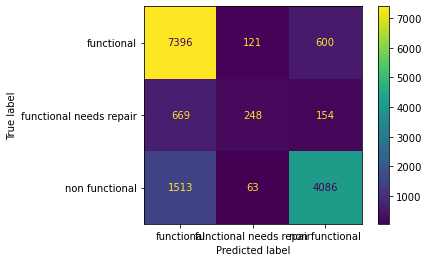

In [213]:
plot_confusion_matrix(cat_boost_pipe1, X_test, y_test);

In [209]:
print(f"""
Our first model's accuracy on the test set is {round(accuracy_score(y_test, y_hat1), 2)}. \n
Our first model's recall on the test set is {round(recall_score(y_test, y_hat1,average= 'macro'), 2)} \n
Our first model's precision on the test set is {round(precision_score(y_test, y_hat1,average= 'macro'), 2)} \n
Our first model's f1-score on the test is {round(f1_score(y_test, y_hat1,average= 'macro'), 2)}.
""")


Our first model's accuracy on the test set is 0.79. 

Our first model's recall on the test set is 0.62 

Our first model's precision on the test set is 0.73 

Our first model's f1-score on the test is 0.65.

